In [2]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
# from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# gps_soup = BeautifulSoup(open(r"/root/thesis_update/thesis_update_final/stock_news/dataset/gps_final/gps_jan_2007.html", encoding="utf8"))

In [4]:
# gps_timestamp = []
# for e in gps_soup.find_all("span", {"class": "article__timestamp"}):
#     gps_timestamp.append(e.get_text())

In [5]:
# gps_timestamp

In [7]:
gps_file = []
for gps_text in gps_soup.find_all("h3"):
    gps_file.append(gps_text.get_text())

In [9]:
gps_file[-10:]

['\n\n                            \n                            1 Top Retail Stock to Buy in 2022\n                        \n',
 '\n\n                            \n                            Wells Fargo Thinks Gap’s Stock is Going to Recover\n                        \n',
 '\n\n                            \n                            Monday’s Top Analysts Upgrades and Downgrades: Airbnb, AT&T, Duke Energy, Etsy, Gap, IBM, Las Vegas Sands, Nvidia, Starbucks, Visa and More\n                        \n',
 '\n\n                            \n                            Is GPS Stock Headed for the Metaverse as Balenciaga and Ye Team Up?\n                        \n',
 '\n\n                            \n                            Which Companies Were the Website Traffic Winners and Losers of November\u202f?\n                        \n',
 '\n\n                            \n                            Analysts Offer Insights on Consumer Goods Companies: Campbell Soup (CPB) and Gap (GPS)\n      

In [10]:
gps_clean1 = []
for gps_text1 in gps_file:
    gps_clean1.append(gps_text1.replace("\n", ""))

In [11]:
gps_remove = []
for e in gps_clean1:
    if e not in ('Intel announces $5.4 billion deal to buy Tower Semiconductor',
 'Intel announces $5.4 billion deal to buy Tower Semiconductor',
 'The most common excuses for not buying an electric vehicle are mostly unfounded',
 'Ray Dalio’s Bridgewater boosts its bets on China',
 'What is the Alfa Romeo Tonale, and why does it come with a non-fungible token?',
 'What is a multicurrency account, and should you get one?',
 '‘Those years passed, and here I am.’ What it’s like to live to 100.',
 "Barron'sInvestors, Beware: These Funds Could Pose a 'Flight Risk' for Junk Bond Markets",
 'No Recent Tickers',
 'Overview'):
        gps_remove.append(e)

In [12]:
gps_space = []
for e in gps_remove:
    gps_space.append(e.strip())

In [13]:
gps_fullstop = []
for e in gps_space:
    gps_fullstop.append(e.replace(".",""))

In [14]:
gps_q = []
for e in gps_fullstop:
    gps_q.append(e.replace("?",""))

In [15]:
gps_colon = []
for e in gps_q:
    gps_colon.append(e.replace(":",""))

In [16]:
gps_comma = []
for e in gps_colon:
    gps_comma.append(e.replace(",",""))

In [17]:
gps_percent = []
for e in gps_comma:
    gps_percent.append(e.replace("%","percent"))

In [18]:
gps_lower = []
for i in range(len(gps_percent)):
    gps_lower.append(gps_percent[i].lower())

In [19]:
gps_pain = []
for e in gps_lower:
    if e not in ( 'marketwatch',
 'company',
 'dow jones network'):
        gps_pain.append(e)

In [22]:
gps_pain[-10:]

['vault nfts launches digital sneakers ahead of highly anticipated stockx ipo',
 'tuesday afternoon analyst upgrades and downgrades delta air gap under armour and more',
 'walmart crypto news what to know as wmt preps to enter the metaverse',
 '1 top retail stock to buy in 2022',
 'wells fargo thinks gap’s stock is going to recover',
 'monday’s top analysts upgrades and downgrades airbnb at&t duke energy etsy gap ibm las vegas sands nvidia starbucks visa and more',
 'is gps stock headed for the metaverse as balenciaga and ye team up',
 'which companies were the website traffic winners and losers of november\u202f',
 'analysts offer insights on consumer goods companies campbell soup (cpb) and gap (gps)',
 'the gamestop stock chart flashes a bearish warning on earnings']

## timestamp_preprocessed

In [26]:
gps_et = []
for e in gps_timestamp:
    gps_et.append(e.replace("ET",""))

In [27]:
gps_at1 = []
for e in gps_et:
    gps_at1.append(e.replace("at",""))

In [28]:
gps_pm1 = []
for e in gps_at1:
    gps_pm1.append(e.replace("p.m.",""))

In [29]:
gps_am1 = []
for e in gps_pm1:
    gps_am1.append(e.replace("a.m.",""))

In [30]:
gps_commas = []
for e in gps_am1:
    gps_commas.append(e.replace(",",""))

In [31]:
gps_fullstops = []
for e in gps_commas:
    gps_fullstops.append(e.replace(".",""))

In [32]:
gps_timestamp_final = gps_fullstops

In [33]:
gps_timestamp_final[-5:]

['Jan 10 2022  8:57  ',
 'Jan 7 2022  3:49  ',
 'Dec 19 2021  9:43  ',
 'Dec 14 2021  11:31  ',
 'Dec 13 2021  11:24  ']

In [34]:
gps_date = [datetime.strptime(x,'%b %d %Y  %I:%M ') for x in gps_timestamp_final]

In [24]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)


## Create Pandas DataFrame

In [35]:

gps_data = pd.DataFrame(
    {'Date': gps_date,
     'text_headlines': gps_pain
     
    })

In [40]:
gps_data.head(3)
gps_news_matrix = tf_vectorizer.fit_transform(gps_data['text_headlines'])

In [47]:
#gps_data.to_csv('gps_topic_selection.csv', index = True)


In [41]:
lda = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=0, verbose=0, n_jobs = -1)

In [42]:
lda_model = lda.fit(gps_news_matrix)
lda_matrix = lda_model.transform(gps_news_matrix)
lda_matrix

array([[0.0498965 , 0.049957  , 0.04984271, 0.80023031, 0.05007348],
       [0.76018149, 0.05996732, 0.05994655, 0.05998984, 0.0599148 ],
       [0.76099861, 0.05976321, 0.05974213, 0.0597861 , 0.05970994],
       ...,
       [0.05831635, 0.05868436, 0.05831908, 0.76636009, 0.05832011],
       [0.04889536, 0.04838158, 0.1114269 , 0.27738173, 0.51391444],
       [0.06411462, 0.05691352, 0.44131193, 0.38099328, 0.05666666]])

In [44]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, gps_news_matrix, 15)

Topics found via LDA:

Topic #0:
stock market gap underperforms outperforms competitors falls day trading rises strong thursday friday compared tuesday

Topic #1:
gap sales sector bln shares store futures 1percent retail retailers 4percent flat year billion stores

Topic #2:
gap eps cents profit hours vs sees october open outlook net share q4 income q3

Topic #3:
sales gap store stocks retail shares retailers rise earnings drop watch fall profit results higher

Topic #4:
surprises updates advisories sears april ceo gap focus kohl new noble barnes fed retailers dell


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2940 samples in 0.002s...
[t-SNE] Computed neighbors for 2940 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2940
[t-SNE] Computed conditional probabilities for sample 2000 / 2940
[t-SNE] Computed conditional probabilities for sample 2940 / 2940
[t-SNE] Mean sigma: 0.000261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.197269
[t-SNE] Error after 1000 iterations: 0.270092


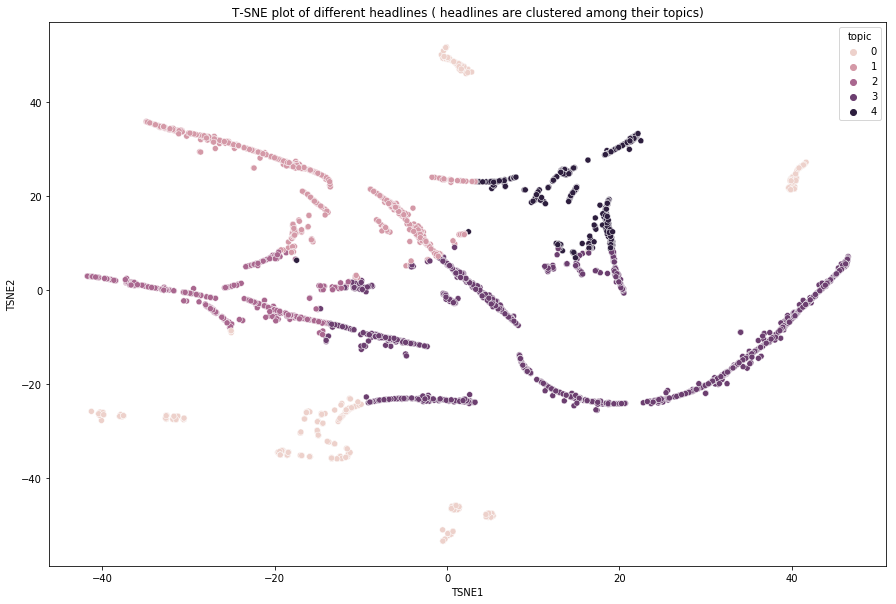

In [46]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()